# HW:1資料分析
### 糖尿病數據集

* 引入函式庫

    *Analysis(分析)
        Numpy
        Pandas
    *Visualization(視覺化)
        Matplotlib
        Seaborn
        Plotly

In [1]:
import pandas as pd # 載入 pandas 函式庫 命名為pd
import numpy as np # 載入 numpy 函式庫 命名為np
import matplotlib.pyplot as plt # 載入 matplotlib.pyplot 函式庫 命名為plt
import seaborn as sns # 載入 seaborn 函式庫 命名為sns
import plotly.express as px # 載入 plotly.express 函式庫 命名為px

* 讀取資料檔案

In [2]:
rowdata = pd.read_csv('./diabetes.csv')  # 讀入csv檔，並把資料命名為 'rowdata'
rowdata.head(10) # show出前10筆資料

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


* 查看資料型態

In [3]:
rowdata.dtypes #查看資料集內的特徵資料型態

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* 查看資料分布筆數

In [4]:
# 確認Outcome分組數量(確認有糖尿病和沒糖尿病的人的數量)
Count = rowdata.groupby(["Outcome"], as_index=False)["Outcome"].agg({"cnt": "count"}) # 將count命名為cnt
print(Count)

   Outcome  cnt
0        0  500
1        1  268


Text(0.5, 1.0, 'Outcome')

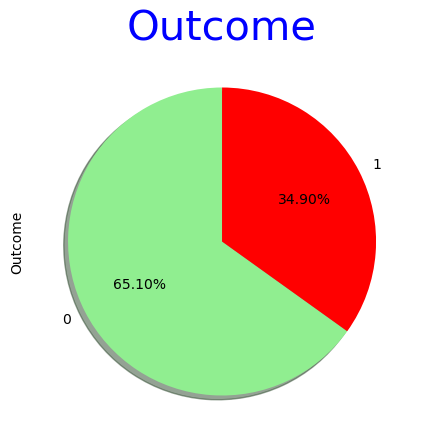

In [6]:
# 畫圖
colors = ["lightgreen", "red"]
rowdata["Outcome"].value_counts().plot(
    kind="pie", #圖形類別: 圓餅圖
    shadow=True, #圓餅圖要不要有陰影~有陰影
    startangle=90,#設定圓餅圖角度
    figsize=(5, 5),#設定圖形的大小
    autopct="%1.2f%%",
    colors=colors,
)
plt.title("Outcome", fontsize=30, color="blue")

從圖中可以確認資料全為1或0(有得病或沒得病)，沒有雜訊資料。

* 利用圖表檢查數值特徵分布

C:\Users\ryani\AppData\Local\Temp\ipykernel_19148\3345685255.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rowdata[column])
C:\Users\ryani\AppData\Local\Temp\ipykernel_19148\3345685255.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rowdata[column])
C:\Users\ryani\AppData\Local\Temp\ip

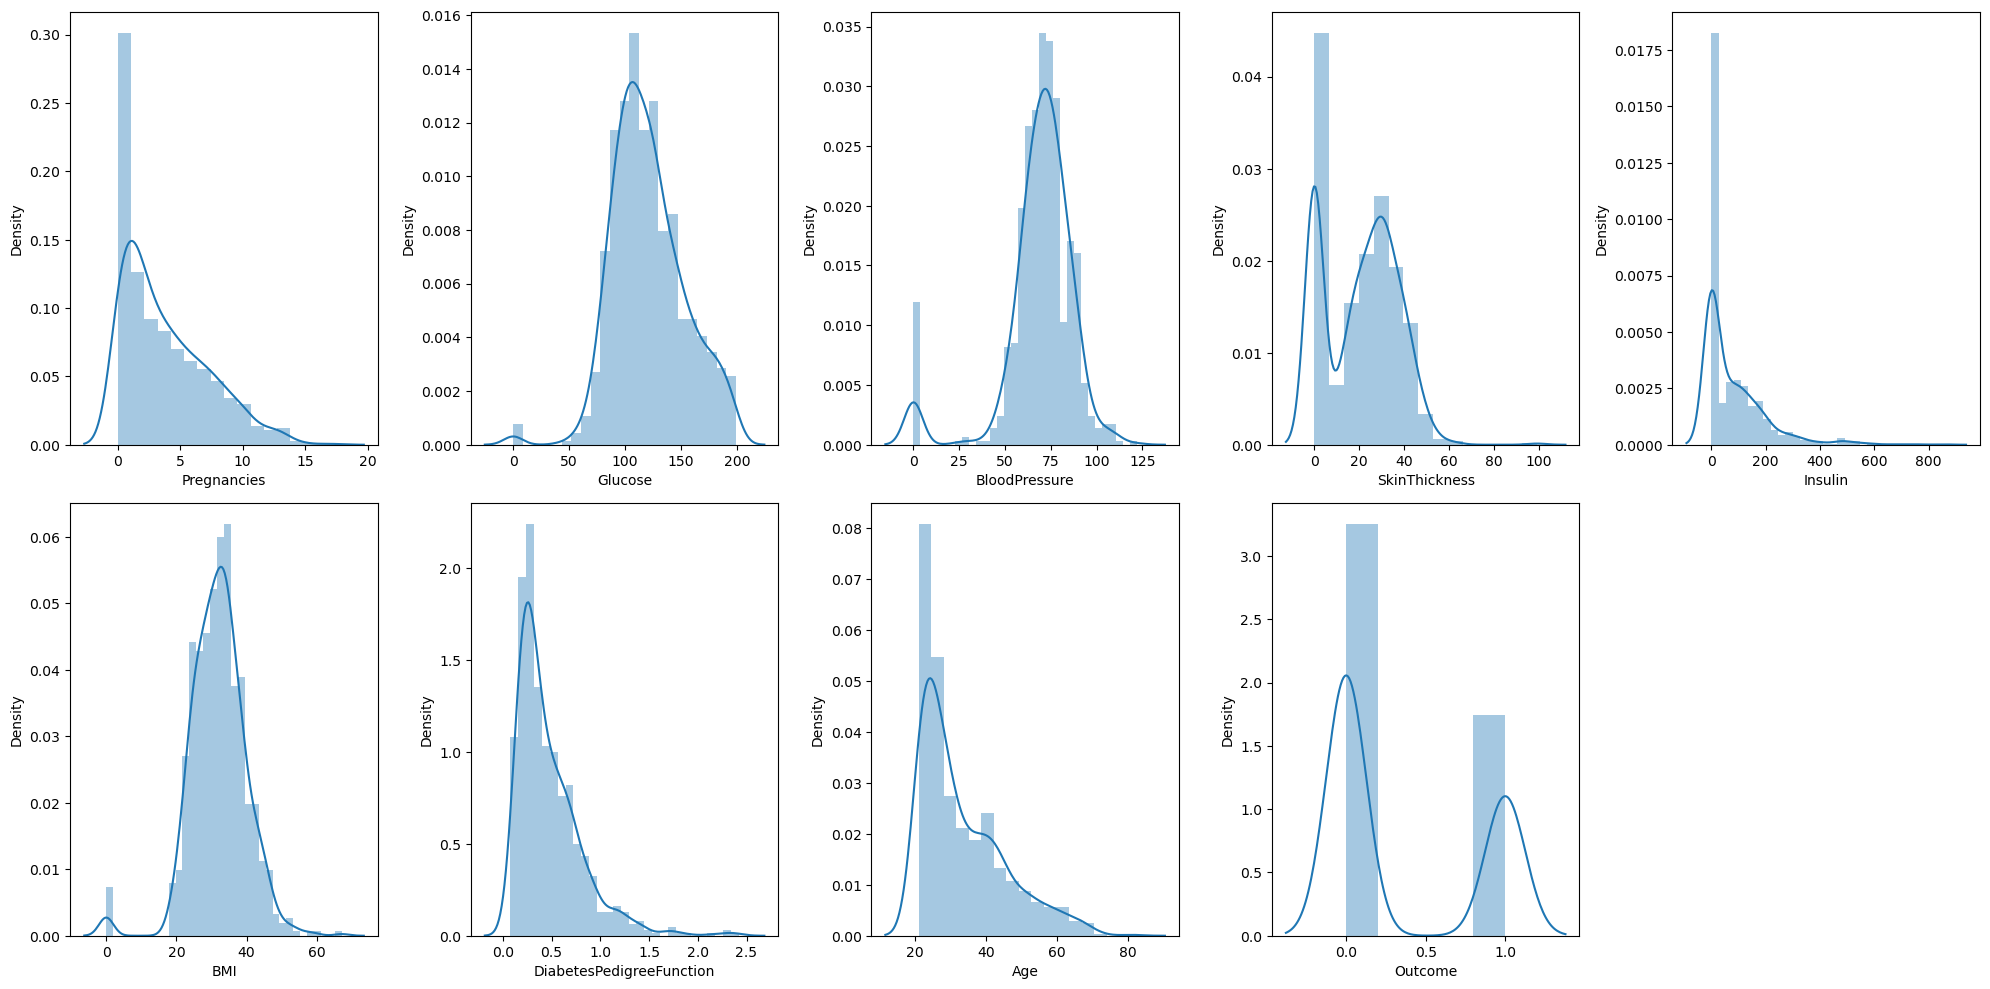

In [7]:
#紀錄資料型態不是object的數量(這裡的資料全為int或float，也就是可以紀錄全部資料的數值特徵分布)
num_cols = [col for col in rowdata.columns if rowdata[col].dtype != 'object'] #將除了object資料型態的全部特徵命名成num_cols
plt.figure(figsize = (20,10)) #決定圖片大小
plot_number = 1 #決定圖片位置

for column in num_cols:
    if plot_number <= 10:
        ax = plt.subplot(2, 5, plot_number) #限制只畫出2*5個圖表(我們只有10種資料)
        sns.distplot(rowdata[column])
        plt.xlabel(column)
        
    plot_number += 1

plt.tight_layout()
plt.show()

##### 資料探索
* 進行描述性統計的特徵分析，繪製分布估計圖(kde)  
分別觀察以下特徵和有無糖尿病各自的關係程度高低  
'懷孕'與'有無糖尿病'  
'葡萄糖'與'有無糖尿病'  
'血壓'與'有無糖尿病'  
'皮膚厚度'與'有無糖尿病'  
'胰島素'與'有無糖尿病'  
'身體質量指數'與'有無糖尿病'  
'糖尿病家族函數'與'有無糖尿病'  
'年齡'與'有無糖尿病'

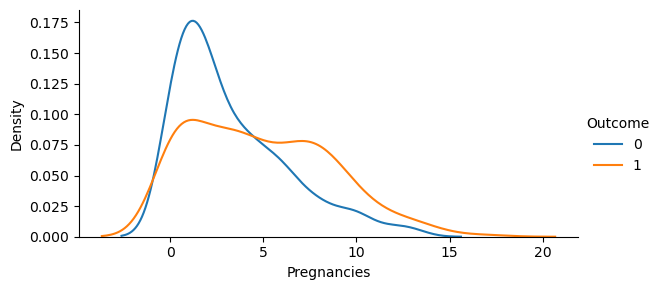

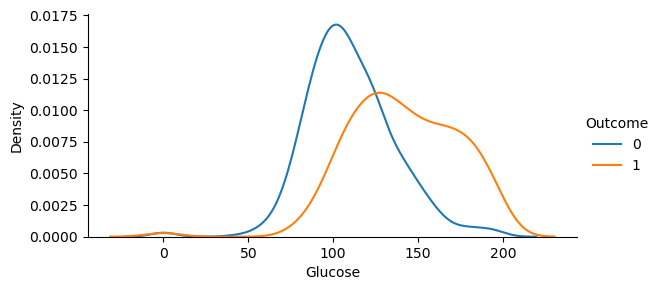

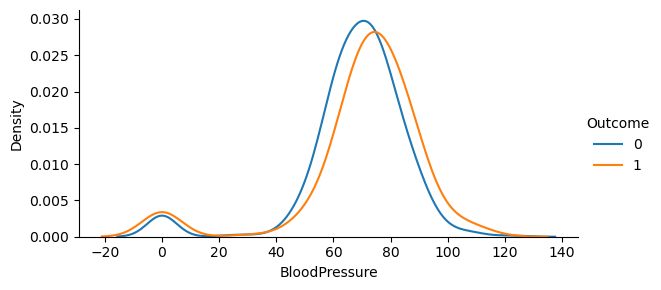

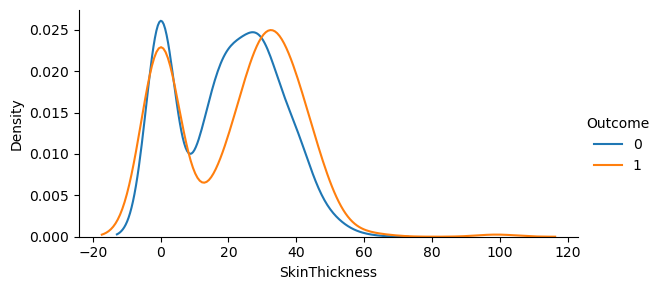

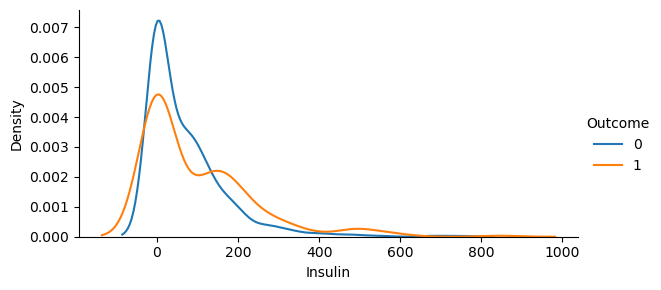

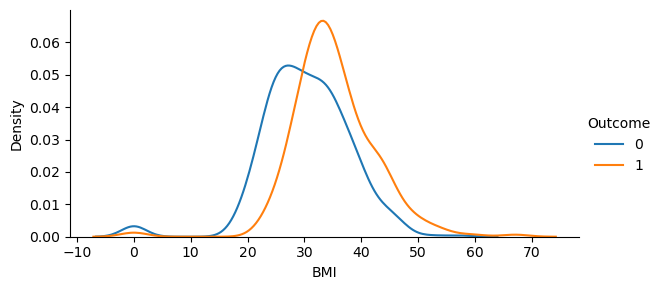

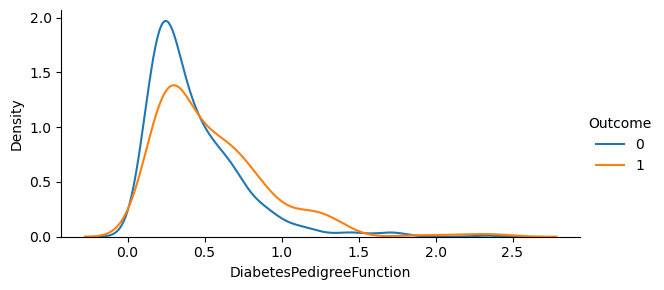

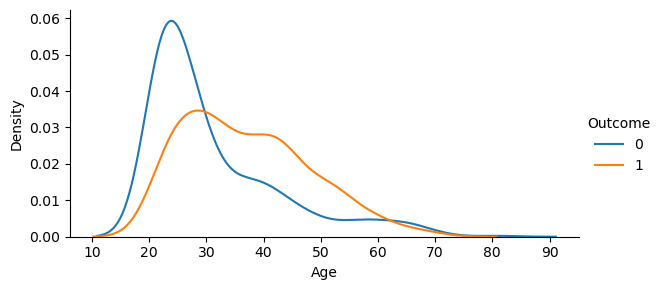

In [11]:
#定義畫圖的function
def kde(col):
    grid = sns.FacetGrid(rowdata, hue="Outcome", height = 3, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
#利用for迴圈把所有特徵與有無糖尿病的分布估計圖畫出
for feature in num_cols:
    if(feature == "Outcome"): #當特徵為有無糖尿病時，不用執行kde(也就是不用畫有無糖尿病對有無糖尿病的關係圖)
        continue
    kde(feature)

* 特徵工程

In [12]:
#檢查各特徵有無缺失值
rowdata.isnull().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

發現皆無缺失值，所以不用進行移除缺失值的動作。  
也無須矯正資料型態，因為所有資料已皆為int或float的正確型式。
### 完成資料清整

* 區分**特徵欄位**與**預測欄位**(也就是把有無糖尿病的欄位結果與其他特徵區分出來)

In [14]:
# 將除了Outcome(有無糖尿病)的剩餘特徵欄位命名為 feature
feature = rowdata.drop(['Outcome'],axis=1)

# 將Outcome(有無糖尿病)欄位命名為 sick
sick = rowdata['Outcome']

In [15]:
#列出前5筆確認有沒有問題
feature.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
# 查看所有特徵欄位(除了有無糖尿病)的資料型態
feature.dtypes 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

#### 模型開發

* 1.切分資料集

In [18]:
#import python的KFold函式
from sklearn.model_selection import KFold

#定義KFlod的交叉驗證(隨機拆成5份，之後其中1份要拿來驗證)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

* 2.選擇模型

In [19]:
#import 線性回歸的模型
from sklearn.linear_model import LinearRegression

#使用線性回歸
model = LinearRegression()

* 3.交叉驗證
* 4.計算偏差Bias與變異性Variance

In [26]:
#執行KFold交叉驗證
test_bias = [] #測試時與測試數據的偏差
test_variance = [] #測試時與測試數據的變異性
train_errors = [] #訓練時與訓練數據的誤差
test_errors = [] #測試時與測試數據的誤差

for train_index, test_index in kf.split(feature):

    #拆分數據為訓練集與測試集
    x_train, y_train = feature.iloc[train_index], sick[train_index]
    x_test, y_test = feature.iloc[test_index], sick[test_index]

    #訓練模型
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train) #預測訓練集資料
    y_test_pred = model.predict(x_test) #預測測試集資料

    #計算偏差Bias與變異性Variance(利用函式庫中就有的mean和var)
    bias = np.mean((y_test_pred - np.mean(y_test))**2)
    variance = np.var(y_test_pred)
    #將每次測試出現的誤差與變異性分別加入list中
    test_bias.append(bias) 
    test_variance.append(variance)

    #計算訓練與測試的誤差
    train_error = np.sum((y_train_pred - y_train)**2)/len(y_train_pred)
    test_error = np.sum((y_test_pred - y_test)**2)/len(y_test_pred)
    #將訓練與測試的誤差分別加入list中
    train_errors.append(train_error)
    test_errors.append(test_error)

#### 將開發出模型的誤差、變異性和誤差輸出

In [27]:
#輸出bias和variance
print("Bias:", test_bias)
print("Variance:", test_variance)

#輸出平均訓練誤差與平均測試誤差
print("平均訓練誤差:", sum(train_errors)/len(train_errors))
print("平均測試誤差:", sum(test_errors)/len(test_errors))

Bias: [0.07718896991939588, 0.06926846516201818, 0.09229269672075992, 0.05438217433718144, 0.06754467639421985]
Variance: [0.07695418435409108, 0.06813176301838911, 0.09069494949443327, 0.054292374566176776, 0.06735834083681912]
平均訓練誤差: 0.15748229390598653
平均測試誤差: 0.16571918760189588
